Dataset has my viewing activity from january, 2021 till june 2021

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
#import the dataset
df=pd.read_csv('/Users/rakshakannusami/Downloads/NETFLIX WRAPPED/netflix-report/CONTENT_INTERACTION/ViewingActivity.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4453 entries, 0 to 4452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             4453 non-null   object
 1   Start Time               4453 non-null   object
 2   Duration                 4453 non-null   object
 3   Attributes               1786 non-null   object
 4   Title                    4453 non-null   object
 5   Supplemental Video Type  1410 non-null   object
 6   Device Type              4453 non-null   object
 7   Bookmark                 4453 non-null   object
 8   Latest Bookmark          4453 non-null   object
 9   Country                  4453 non-null   object
dtypes: object(10)
memory usage: 348.0+ KB


In [4]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country'],
      dtype='object')

In [5]:
drop_columns = ['Country', 'Bookmark', 'Latest Bookmark', 'Attributes']
df = df.drop(columns = drop_columns)

In [6]:
df.head()

,Profile Name,Start Time,Duration,Title,Supplemental Video Type,Device Type
0,Ambika,2021-06-12 14:35:51,00:20:06,Notting Hill,NaN,DefaultWidevineAndroidPhone
1,Ambika,2021-06-12 10:13:37,00:08:35,Start-Up: Season 1: Elevator Speech (Episode 14),NaN,Netflix Chrome MAC (Cadmium) HTML 5
2,Ambika,2021-06-12 09:05:29,00:36:49,Start-Up: Season 1: Comfort Zone (Episode 13),NaN,Netflix Chrome MAC (Cadmium) HTML 5
3,Ambika,2021-06-12 07:59:18,00:52:07,Start-Up: Season 1: Acqhire (Episode 12),NaN,Netflix Chrome MAC (Cadmium) HTML 5
4,Ambika,2021-06-12 07:23:44,00:34:35,Start-Up: Season 1: Exit (Episode 11),NaN,Netflix Chrome MAC (Cadmium) HTML 5


In [7]:
df[['Date','Time']] = df['Start Time'].str.split(' ',expand = True, n=2)

In [8]:
df.head()

,Profile Name,Start Time,Duration,Title,Supplemental Video Type,Device Type,Date,Time
0,Ambika,2021-06-12 14:35:51,00:20:06,Notting Hill,NaN,DefaultWidevineAndroidPhone,2021-06-12,14:35:51
1,Ambika,2021-06-12 10:13:37,00:08:35,Start-Up: Season 1: Elevator Speech (Episode 14),NaN,Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,10:13:37
2,Ambika,2021-06-12 09:05:29,00:36:49,Start-Up: Season 1: Comfort Zone (Episode 13),NaN,Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,09:05:29
3,Ambika,2021-06-12 07:59:18,00:52:07,Start-Up: Season 1: Acqhire (Episode 12),NaN,Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,07:59:18
4,Ambika,2021-06-12 07:23:44,00:34:35,Start-Up: Season 1: Exit (Episode 11),NaN,Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,07:23:44


In [9]:
df[['Hour','Min','Sec']] = df['Time'].str.split(':',expand = True, n=2)

In [10]:
df.head()

,Profile Name,Start Time,Duration,Title,Supplemental Video Type,Device Type,Date,Time,Hour,Min,Sec
0,Ambika,2021-06-12 14:35:51,00:20:06,Notting Hill,NaN,DefaultWidevineAndroidPhone,2021-06-12,14:35:51,14,35,51
1,Ambika,2021-06-12 10:13:37,00:08:35,Start-Up: Season 1: Elevator Speech (Episode 14),NaN,Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,10:13:37,10,13,37
2,Ambika,2021-06-12 09:05:29,00:36:49,Start-Up: Season 1: Comfort Zone (Episode 13),NaN,Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,09:05:29,09,05,29
3,Ambika,2021-06-12 07:59:18,00:52:07,Start-Up: Season 1: Acqhire (Episode 12),NaN,Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,07:59:18,07,59,18
4,Ambika,2021-06-12 07:23:44,00:34:35,Start-Up: Season 1: Exit (Episode 11),NaN,Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,07:23:44,07,23,44


# How many people use this account?

In [11]:
df['Profile Name'].unique()

array(['Ambika', 'Raksha', 'Uchitha', 'Ujesha', 'Upasana'], dtype=object)

### There are 5 profiles on this account

In [12]:
# Removing rows with less than 2 minutes as duration
df['Duration'] = pd.to_timedelta(df['Duration'])
df = df[df['Duration'].dt.total_seconds() > 120]
df.shape

(2448, 11)

In [13]:
#df=df.rename(columns = {'Start Time':'Date'})

In [14]:
#Convert Start Time to datetime. Currently it is object
df['Start Time'] = pd.to_datetime(df['Start Time'])
#my_data['Date'] = my_data['Date'].dt.tz_localize('GMT').dt.tz_convert('Asia/Kolkata') #Convert from UTC to IST. 
df['Year'] =df['Start Time'].dt.year
df['Month'] = df['Start Time'].dt.month
df['Day'] = df['Start Time'].dt.day
df['day_of_week'] = df['Start Time'].dt.dayofweek
df['day_name'] = df['Start Time'].dt.day_name()

In [15]:
df = df[df['Supplemental Video Type'].isna()]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 4451
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Profile Name             2436 non-null   object         
 1   Start Time               2436 non-null   datetime64[ns] 
 2   Duration                 2436 non-null   timedelta64[ns]
 3   Title                    2436 non-null   object         
 4   Supplemental Video Type  0 non-null      object         
 5   Device Type              2436 non-null   object         
 6   Date                     2436 non-null   object         
 7   Time                     2436 non-null   object         
 8   Hour                     2436 non-null   object         
 9   Min                      2436 non-null   object         
 10  Sec                      2436 non-null   object         
 11  Year                     2436 non-null   int64          
 12  Month               

In [17]:
df[['TV Show', 'Season', 'Episode']] = df['Title'].str.split(':', expand = True, n = 2)

In [18]:
df['Content Type'] = df['Season'].apply(lambda x : 'Movie' if x == None else 'Series')

In [19]:
df.drop(columns = ['Supplemental Video Type'], inplace=True)

In [20]:
df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Date,Time,Hour,Min,Sec,Year,Month,Day,day_of_week,day_name,TV Show,Season,Episode,Content Type
0,Ambika,2021-06-12 14:35:51,00:20:06,Notting Hill,DefaultWidevineAndroidPhone,2021-06-12,14:35:51,14,35,51,2021,6,12,5,Saturday,Notting Hill,None,None,Movie
1,Ambika,2021-06-12 10:13:37,00:08:35,Start-Up: Season 1: Elevator Speech (Episode 14),Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,10:13:37,10,13,37,2021,6,12,5,Saturday,Start-Up,Season 1,Elevator Speech (Episode 14),Series
2,Ambika,2021-06-12 09:05:29,00:36:49,Start-Up: Season 1: Comfort Zone (Episode 13),Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,09:05:29,09,05,29,2021,6,12,5,Saturday,Start-Up,Season 1,Comfort Zone (Episode 13),Series
3,Ambika,2021-06-12 07:59:18,00:52:07,Start-Up: Season 1: Acqhire (Episode 12),Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,07:59:18,07,59,18,2021,6,12,5,Saturday,Start-Up,Season 1,Acqhire (Episode 12),Series
4,Ambika,2021-06-12 07:23:44,00:34:35,Start-Up: Season 1: Exit (Episode 11),Netflix Chrome MAC (Cadmium) HTML 5,2021-06-12,07:23:44,07,23,44,2021,6,12,5,Saturday,Start-Up,Season 1,Exit (Episode 11),Series


In [21]:
df['Device Type'].unique()

array(['DefaultWidevineAndroidPhone',
       'Netflix Chrome MAC (Cadmium) HTML 5', 'Chrome PC (Cadmium)',
       'Netflix Windows App - Cadmium Windows Mobile',
       'Android DefaultWidevineL3Phone Android Phone',
       'Samsung 2014 MStar DTV'], dtype=object)

In [22]:
df.loc[df['Device Type'].str.contains('Chrome'), 'Device Type'] = 'Laptop'
df.loc[df['Device Type'].str.contains('Mobile'), 'Device Type'] = 'Mobile'
df.loc[df['Device Type'].str.contains('Phone'), 'Device Type'] = 'Mobile'
df.loc[df['Device Type'].str.contains('TV'), 'Device Type'] = 'TV'

In [23]:
df['Device Type'].unique()

array(['Mobile', 'Laptop', 'TV'], dtype=object)

In [24]:
df.sample(10)

,Profile Name,Start Time,Duration,Title,Device Type,Date,Time,Hour,Min,Sec,Year,Month,Day,day_of_week,day_name,TV Show,Season,Episode,Content Type
3899,Upasana,2021-02-13 07:10:43,01:10:10,Search WWW: Season 1: Episode 1,TV,2021-02-13,07:10:43,07,10,43,2021,2,13,5,Saturday,Search WWW,Season 1,Episode 1,Series
2006,Uchitha,2021-06-10 07:46:09,00:06:05,Some Assembly Required: Season 1: Lobster Trap...,Laptop,2021-06-10,07:46:09,07,46,09,2021,6,10,3,Thursday,Some Assembly Required,Season 1,Lobster Trap (Episode 10),Series
2283,Uchitha,2021-01-22 15:20:16,00:20:44,Hunter X Hunter (2011): Season 1: Departure x ...,TV,2021-01-22,15:20:16,15,20,16,2021,1,22,4,Friday,Hunter X Hunter (2011),Season 1,Departure x and x Friends (Episode 1),Series
2635,Ujesha,2021-05-16 09:44:56,00:21:32,CAROLE & TUESDAY: Part 1: True Colors (Episode 1),Laptop,2021-05-16,09:44:56,09,44,56,2021,5,16,6,Sunday,CAROLE & TUESDAY,Part 1,True Colors (Episode 1),Series
3397,Upasana,2021-04-11 19:01:10,00:23:09,The Bold Type: Season 1: The Breast Issue (Epi...,Mobile,2021-04-11,19:01:10,19,01,10,2021,4,11,6,Sunday,The Bold Type,Season 1,The Breast Issue (Episode 6),Series
4195,Upasana,2021-01-18 18:16:05,00:40:14,Tribhanga - Tedhi Medhi Crazy,Laptop,2021-01-18,18:16:05,18,16,05,2021,1,18,0,Monday,Tribhanga - Tedhi Medhi Crazy,None,None,Movie
1272,Raksha,2021-06-01 08:00:04,00:21:32,The Good Place: Season 2: Team Cockroach (Epis...,Laptop,2021-06-01,08:00:04,08,00,04,2021,6,1,1,Tuesday,The Good Place,Season 2,Team Cockroach (Episode 3),Series
4399,Upasana,2021-01-03 19:46:59,00:02:56,What's Wrong with Secretary Kim: Season 1: Epi...,Laptop,2021-01-03,19:46:59,19,46,59,2021,1,3,6,Sunday,What's Wrong with Secretary Kim,Season 1,Episode 14,Series
2184,Uchitha,2021-02-24 15:36:25,00:21:02,Cardcaptor Sakura: Cardcaptor Sakura: Clow Car...,TV,2021-02-24,15:36:25,15,36,25,2021,2,24,2,Wednesday,Cardcaptor Sakura,Cardcaptor Sakura,Clow Card: Sakura and Tomoyo and The Big Hous...,Series
499,Ambika,2021-04-15 06:27:52,00:08:35,Schitt's Creek: Season 3: Murder Mystery (Epis...,Laptop,2021-04-15,06:27:52,06,27,52,2021,4,15,3,Thursday,Schitt's Creek,Season 3,Murder Mystery (Episode 6),Series


In [25]:
df['Profile Name'].value_counts()

Upasana    836
Ambika     770
Raksha     389
Uchitha    343
Ujesha      98
Name: Profile Name, dtype: int64

In [26]:
watch_time_days = df.groupby(by=['Profile Name'])['Duration'].sum().dt.days

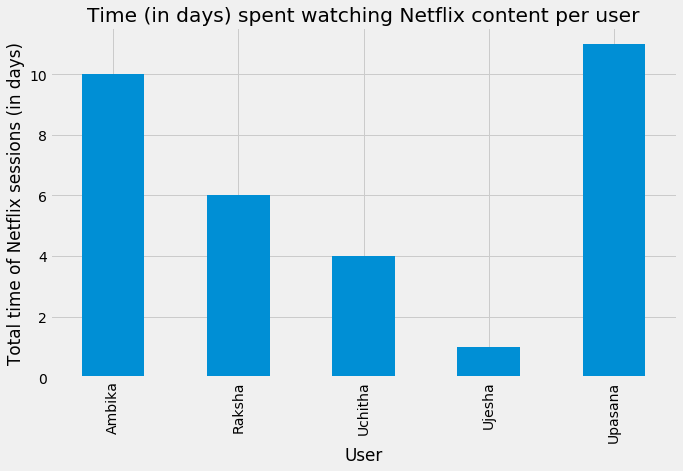

In [46]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,6))
watch_time_days.plot(kind='bar')
ax.set_ylabel('Total time of Netflix sessions (in days)')
ax.set_xlabel('User')
ax.set_title('Time (in days) spent watching Netflix content per user')
plt.show()

In [28]:
df = df[df['Profile Name']=='Raksha']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 1219 to 1972
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   Profile Name  389 non-null    object         
 1   Start Time    389 non-null    datetime64[ns] 
 2   Duration      389 non-null    timedelta64[ns]
 3   Title         389 non-null    object         
 4   Device Type   389 non-null    object         
 5   Date          389 non-null    object         
 6   Time          389 non-null    object         
 7   Hour          389 non-null    object         
 8   Min           389 non-null    object         
 9   Sec           389 non-null    object         
 10  Year          389 non-null    int64          
 11  Month         389 non-null    int64          
 12  Day           389 non-null    int64          
 13  day_of_week   389 non-null    int64          
 14  day_name      389 non-null    object         
 15  TV Show       389 n

In [30]:
df.head()

,Profile Name,Start Time,Duration,Title,Device Type,Date,Time,Hour,Min,Sec,Year,Month,Day,day_of_week,day_name,TV Show,Season,Episode,Content Type
1219,Raksha,2021-06-12 06:31:39,01:00:58,The Intern,Laptop,2021-06-12,06:31:39,06,31,39,2021,6,12,5,Saturday,The Intern,None,None,Movie
1220,Raksha,2021-06-11 17:39:06,00:56:05,The Intern,Laptop,2021-06-11,17:39:06,17,39,06,2021,6,11,4,Friday,The Intern,None,None,Movie
1222,Raksha,2021-06-08 16:08:11,00:10:08,The Good Place: Season 3: Everything is Bonzer...,Laptop,2021-06-08,16:08:11,16,08,11,2021,6,8,1,Tuesday,The Good Place,Season 3,Everything is Bonzer (Episode 1),Series
1223,Raksha,2021-06-07 09:16:47,00:11:43,The Good Place: Season 3: Everything is Bonzer...,Laptop,2021-06-07,09:16:47,09,16,47,2021,6,7,0,Monday,The Good Place,Season 3,Everything is Bonzer (Episode 1),Series
1226,Raksha,2021-06-06 18:33:18,00:08:15,The Edge of Seventeen,Laptop,2021-06-06,18:33:18,18,33,18,2021,6,6,6,Sunday,The Edge of Seventeen,None,None,Movie


In [31]:
df['TV Show'].value_counts().head(10)

The Bold Type             68
Good Girls                55
The Good Place            39
Trinkets                  27
Behind Her Eyes           22
Teenage Bounty Hunters    20
The Queen's Gambit        15
Ginny & Georgia           14
Girlboss                  14
DASH & LILY               10
Name: TV Show, dtype: int64

Text(0, 0.5, 'Frequency')

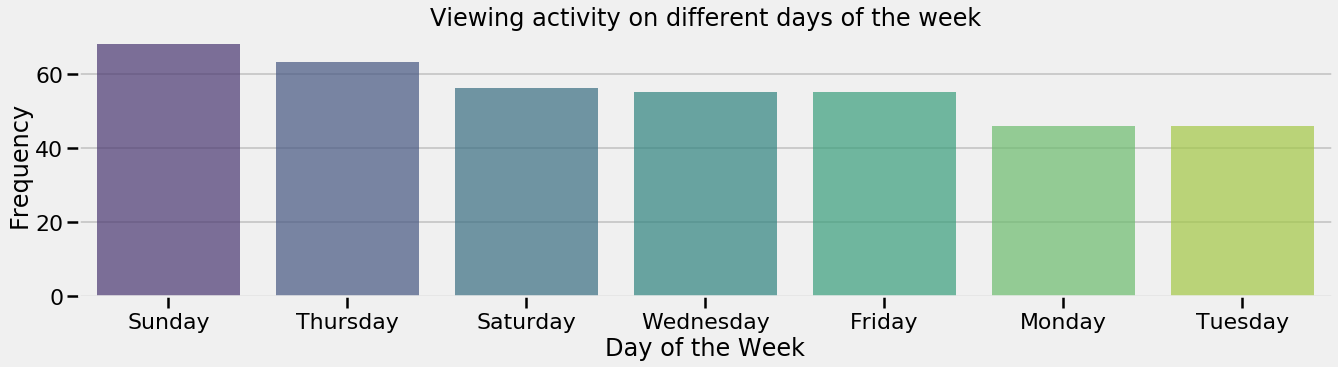

In [49]:
import seaborn as sns
sns.set_context("poster")
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
ax = sns.barplot(x=df["day_name"].value_counts().index, y=df["day_name"].value_counts(), palette="viridis",alpha=0.7)
plt.title("Viewing activity on different days of the week")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")

/Users/rakshakannusami/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Viewing activity of different content type')

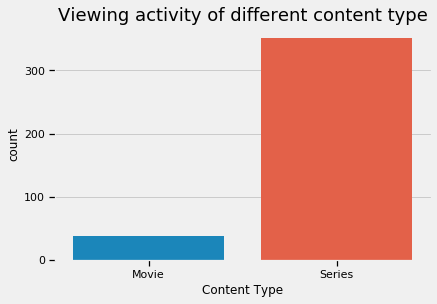

In [53]:
# Which is more watched? movie or series?
sns.countplot(df['Content Type'])
sns.set_context("talk")
plt.title("Viewing activity of different content type")

/Users/rakshakannusami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


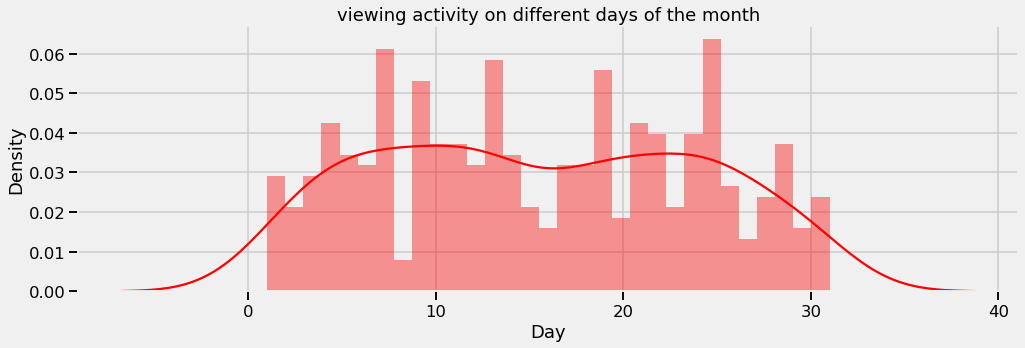

In [54]:
#Day of the month - Monthly viewing distribution
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("viewing activity on different days of the month")
ax = sns.distplot(df['Day'],bins=31,color="red",hist=True)

/Users/rakshakannusami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


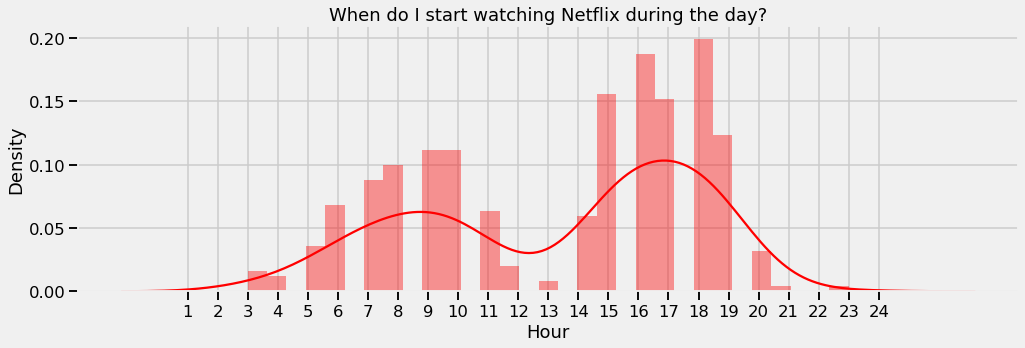

In [55]:
#Hour of the day viewing distribution
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.xticks(range(1, 25))
plt.title("When do I start watching Netflix during the day?")
ax = sns.distplot(df['Hour'],bins=31,color="red",hist=True)

Text(0.5, 1.0, 'What do I watch? Movies or Series?')

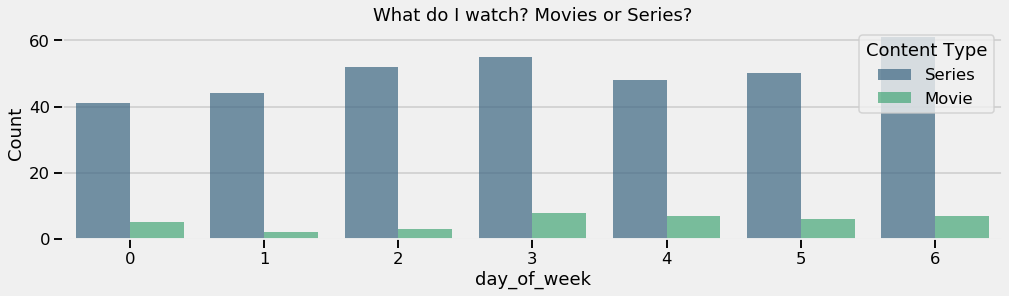

In [56]:
show_freq = df.groupby('Content Type')['day_of_week'].value_counts().sort_values(ascending=False).reset_index(name='Count')
#show_freq
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
ax = sns.barplot(x=show_freq["day_of_week"], y=show_freq["Count"], hue=show_freq["Content Type"], palette="viridis",alpha=0.7)
plt.title("What do I watch? Movies or Series?")

In [57]:
df_tvshow = df.loc[df['Content Type'] == 'Series']
df_tvshow.index = pd.RangeIndex(len(df_tvshow.index)) 
df_tvshow.head()

,Profile Name,Start Time,Duration,Title,Device Type,Date,Time,Hour,Min,Sec,Year,Month,Day,day_of_week,day_name,TV Show,Season,Episode,Content Type
0,Raksha,2021-06-08 16:08:11,00:10:08,The Good Place: Season 3: Everything is Bonzer...,Laptop,2021-06-08,16:08:11,16,08,11,2021,6,8,1,Tuesday,The Good Place,Season 3,Everything is Bonzer (Episode 1),Series
1,Raksha,2021-06-07 09:16:47,00:11:43,The Good Place: Season 3: Everything is Bonzer...,Laptop,2021-06-07,09:16:47,09,16,47,2021,6,7,0,Monday,The Good Place,Season 3,Everything is Bonzer (Episode 1),Series
2,Raksha,2021-06-06 08:23:26,00:21:28,The Good Place: Season 2: Somewhere Else (Epis...,Laptop,2021-06-06,08:23:26,08,23,26,2021,6,6,6,Sunday,The Good Place,Season 2,Somewhere Else (Episode 12),Series
3,Raksha,2021-06-06 08:17:46,00:05:39,The Good Place: Season 2: The Burrito (Episode...,Laptop,2021-06-06,08:17:46,08,17,46,2021,6,6,6,Sunday,The Good Place,Season 2,The Burrito (Episode 11),Series
4,Raksha,2021-06-05 19:30:55,00:16:33,The Good Place: Season 2: The Burrito (Episode...,Laptop,2021-06-05,19:30:55,19,30,55,2021,6,5,5,Saturday,The Good Place,Season 2,The Burrito (Episode 11),Series


In [58]:
df_movie = df.loc[df['Content Type'] == 'Movie']
df_movie.index = pd.RangeIndex(len(df_movie.index)) 
df_movie.head()

,Profile Name,Start Time,Duration,Title,Device Type,Date,Time,Hour,Min,Sec,Year,Month,Day,day_of_week,day_name,TV Show,Season,Episode,Content Type
0,Raksha,2021-06-12 06:31:39,01:00:58,The Intern,Laptop,2021-06-12,06:31:39,06,31,39,2021,6,12,5,Saturday,The Intern,None,None,Movie
1,Raksha,2021-06-11 17:39:06,00:56:05,The Intern,Laptop,2021-06-11,17:39:06,17,39,06,2021,6,11,4,Friday,The Intern,None,None,Movie
2,Raksha,2021-06-06 18:33:18,00:08:15,The Edge of Seventeen,Laptop,2021-06-06,18:33:18,18,33,18,2021,6,6,6,Sunday,The Edge of Seventeen,None,None,Movie
3,Raksha,2021-06-06 18:14:54,00:15:58,The Edge of Seventeen,Laptop,2021-06-06,18:14:54,18,14,54,2021,6,6,6,Sunday,The Edge of Seventeen,None,None,Movie
4,Raksha,2021-06-06 16:42:36,00:35:40,The Edge of Seventeen,Laptop,2021-06-06,16:42:36,16,42,36,2021,6,6,6,Sunday,The Edge of Seventeen,None,None,Movie


In [59]:
times_each_show = df_tvshow.groupby('TV Show').Duration.sum().sort_values(ascending = False)[:10]
times_each_show

TV Show
The Bold Type            1 days 07:05:48
Good Girls               0 days 23:25:22
The Good Place           0 days 09:28:20
Ginny & Georgia          0 days 08:29:59
Trinkets                 0 days 08:11:02
Teenage Bounty Hunters   0 days 07:42:47
The Queen's Gambit       0 days 06:16:11
Behind Her Eyes          0 days 04:27:03
Girlboss                 0 days 03:52:38
DASH & LILY              0 days 03:00:44
Name: Duration, dtype: timedelta64[ns]

In [60]:
show_hour = times_each_show.astype('timedelta64[h]')
show_hour

TV Show
The Bold Type             31.0
Good Girls                23.0
The Good Place             9.0
Ginny & Georgia            8.0
Trinkets                   8.0
Teenage Bounty Hunters     7.0
The Queen's Gambit         6.0
Behind Her Eyes            4.0
Girlboss                   3.0
DASH & LILY                3.0
Name: Duration, dtype: float64

In [61]:
df_show_grouped = df_tvshow.groupby(['TV Show'])['Duration'].sum().reset_index(name='Total Time').sort_values(['Total Time'], ascending=False)
xaxis_show = df_show_grouped['TV Show'][:10].tolist() # getting first ten rows as list instead of pd.dataframe
xaxis_show

['The Bold Type',
 'Good Girls',
 'The Good Place',
 'Ginny & Georgia',
 'Trinkets',
 'Teenage Bounty Hunters',
 "The Queen's Gambit",
 'Behind Her Eyes',
 'Girlboss',
 'DASH & LILY']

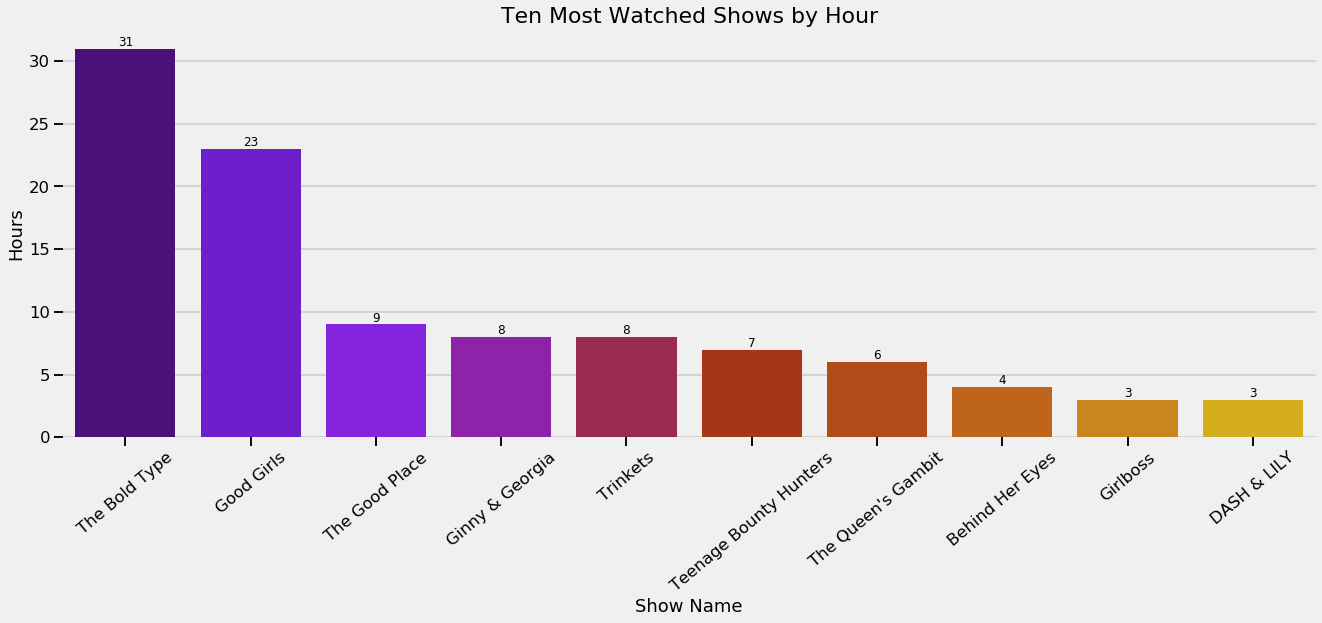

In [62]:
fig = plt.figure(figsize=(20,7))
plt.subplot()
ax = sns.barplot(x = xaxis_show, 
                 y = show_hour,
                 palette="gnuplot")
for i, val in enumerate(show_hour):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title("Ten Most Watched Shows by Hour", fontsize=22)
plt.xlabel("Show Name", fontsize=18)
plt.ylabel("Hours", fontsize=18)
plt.style.use('fivethirtyeight')
plt.box(False)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=40)
plt.show()

In [63]:
# Preparing the data for x axis
df_movie_grouped = df_movie.groupby(['TV Show'])['Duration'].sum().reset_index(name='Total Time').sort_values(['Total Time'], ascending=False)
xaxis_movie = df_movie_grouped['TV Show'][:10].tolist() # getting list outcome instead of pd.dataframe

In [64]:
# Preparing the data for y axis
times_each_movie = df_movie.groupby('TV Show').Duration.sum().sort_values(ascending = False)[:10]
movie_hour = times_each_movie.astype('timedelta64[h]')

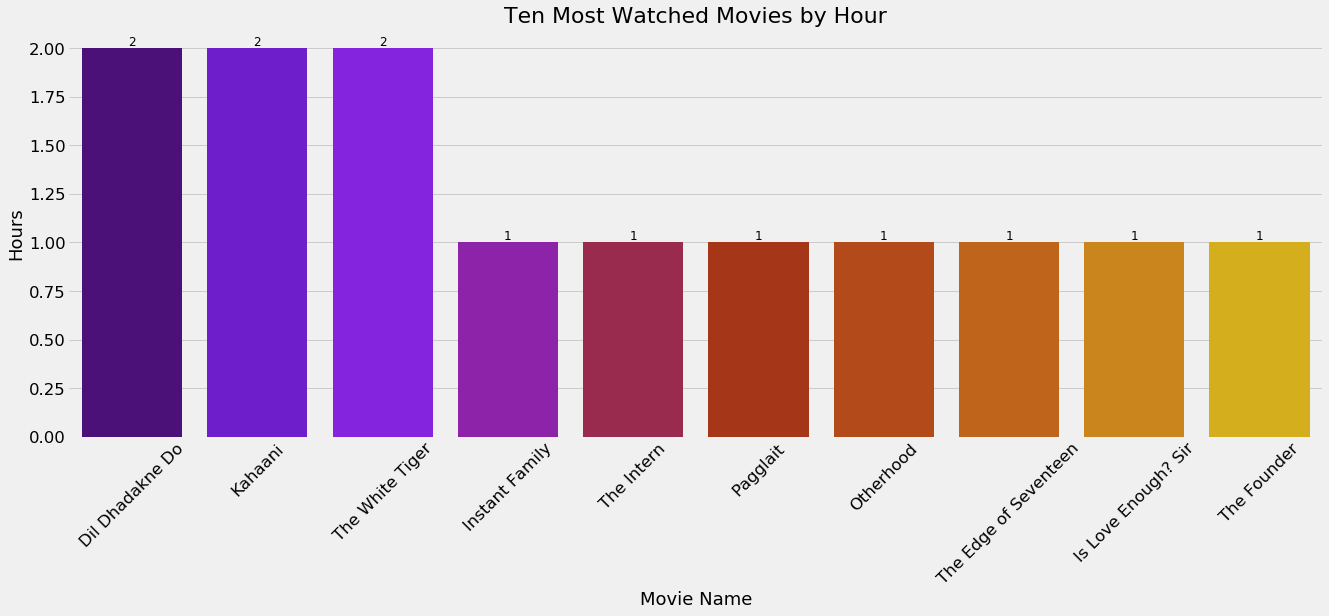

In [65]:
fig = plt.figure(figsize=(20,7))
plt.subplot()
ax = sns.barplot(x = xaxis_movie, 
                 y = movie_hour,
                 palette="gnuplot")
for i, val in enumerate(movie_hour):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.title("Ten Most Watched Movies by Hour", fontsize=22)
plt.xlabel("Movie Name", fontsize=18)
plt.ylabel("Hours", fontsize=18)
plt.style.use('fivethirtyeight')
plt.box(False)
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=45)
plt.show()